<a href="https://colab.research.google.com/github/iHakawaTi/Heart-Attack-Project/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data / Preprocessing

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
# Checking for missing values for all columns
df.isnull().sum().sum()

0

In [32]:
# Checking for Duplicates and dropping them
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

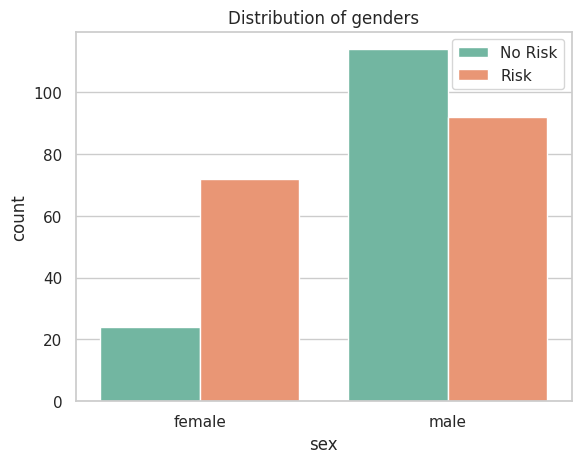

In [45]:
sns.countplot(df, x='sex', hue='output')
plt.title('Distribution of genders')
plt.xticks([0, 1], ['female', 'male'])
plt.legend(['No Risk', 'Risk'])
plt.show()

According to the data, females are more prone to getting heart attacks in proportion to men.

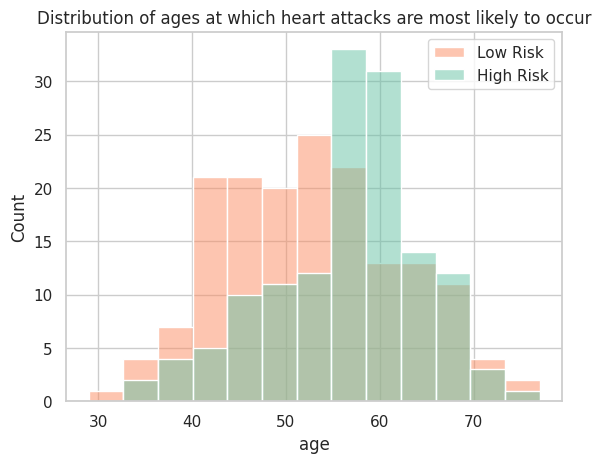

In [43]:
sns.histplot(df, x='age', hue='output')
plt.title('Distribution of ages at which heart attacks are most likely to occur')
plt.legend(['Low Risk', 'High Risk'])
plt.show()

We can tell the peak of risk is around the age group [55-65]

In [49]:
chest_pain_map = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic',
}

exr_ind = {
    0: 'exercise induced',
    1: 'natural cause'
}

heart_attack = {
    0: 'Low Risk',
    1: 'High Risk'
}

df_sunburst = df[['cp', 'exng', 'output']].copy(deep=True)
df_sunburst.cp = df_sunburst.cp.map(chest_pain_map)
df_sunburst.exng = df_sunburst.exng.map(exr_ind)
df_sunburst.output = df_sunburst.output.map(heart_attack)

fig = px.sunburst(
    df_sunburst,
    path=['output', 'cp', 'exng'],
    height=1000,
)

fig.update_layout(
    title=dict(
        text='Distribution of chest pains which lead to could lead ',
        x=0.5
    ),
    margin=dict(t=50, l=0, r=0, b=10)
)
fig.show()

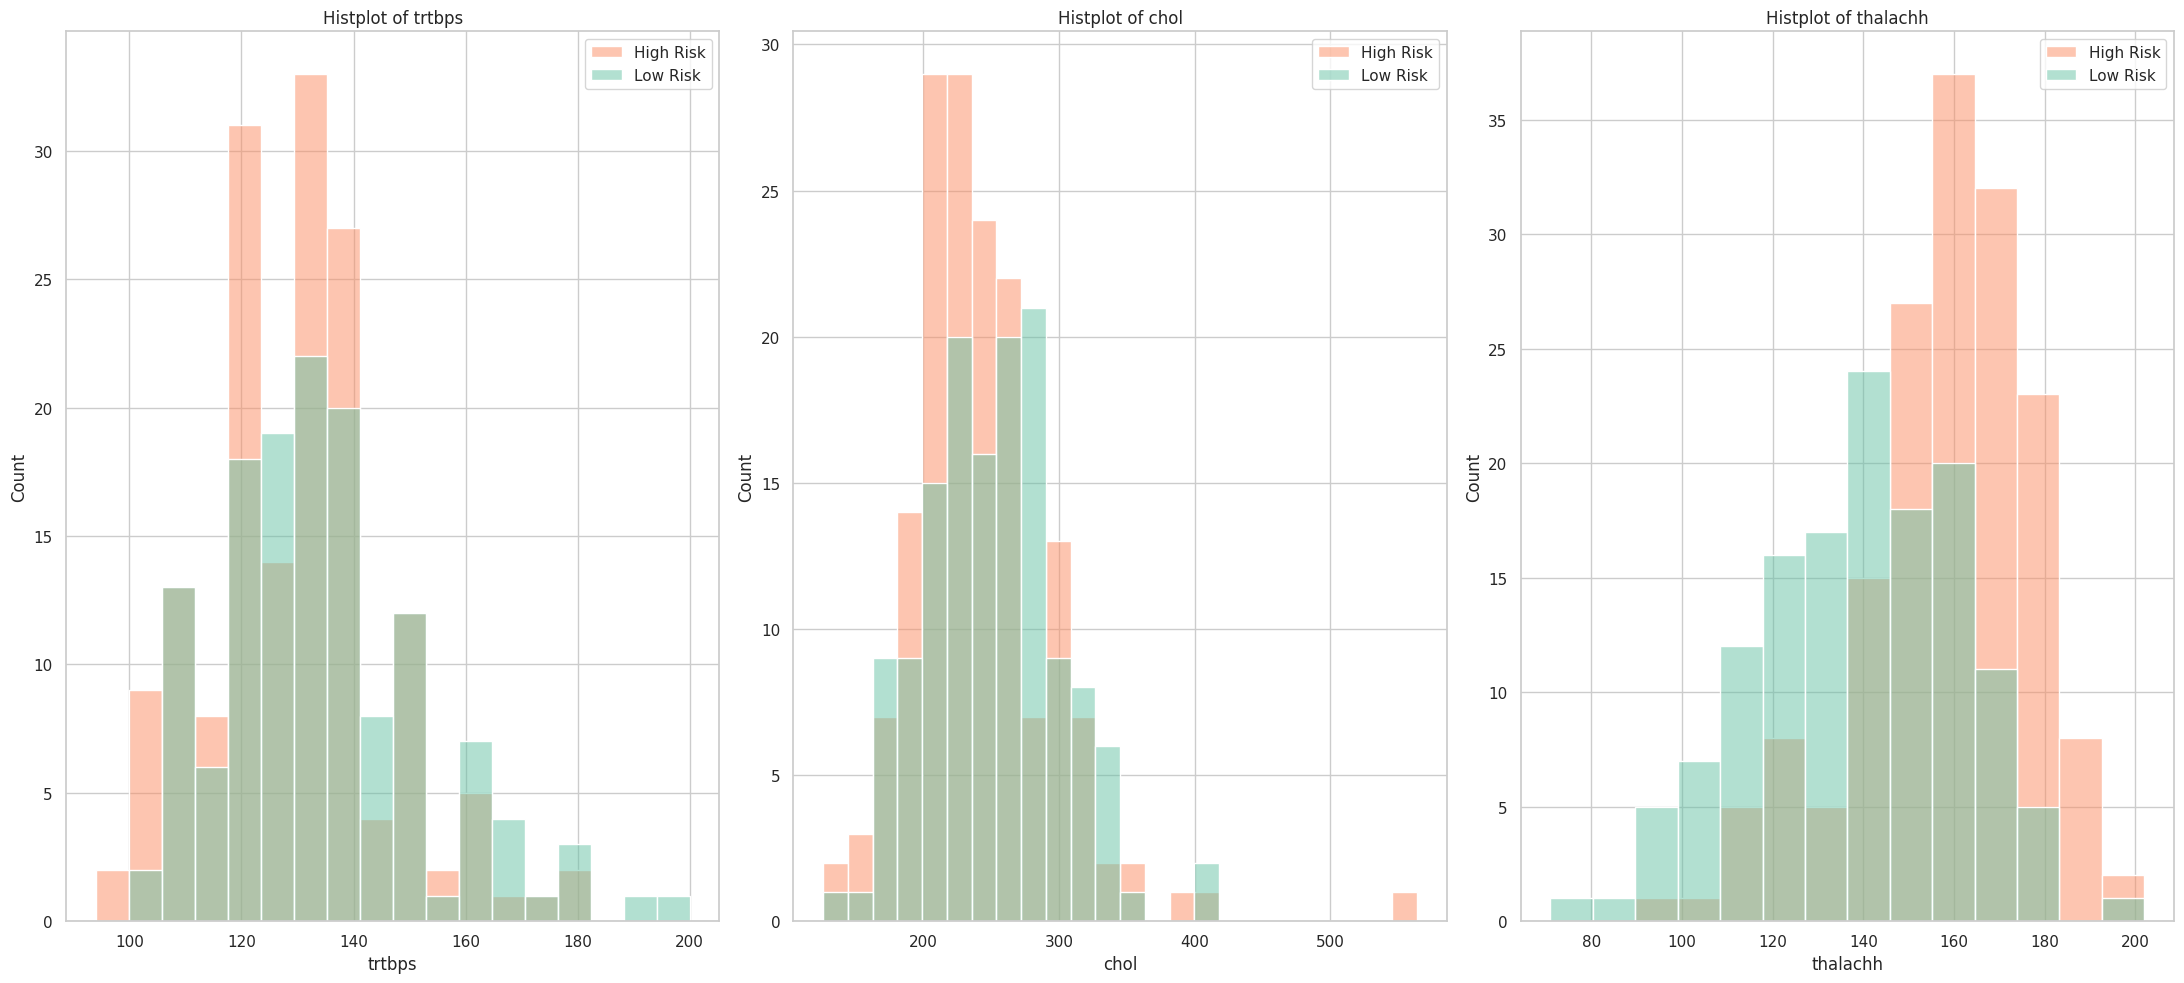

In [52]:
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(22,10))
for ind, column in enumerate(['trtbps', 'chol', 'thalachh']):
    row = ind//cols
    col = ind%cols
    sns.histplot(df, x=column, hue='output', ax=axes[col])
    axes[col].legend(['High Risk', 'Low Risk'])
    axes[col].set_title(f'Histplot of {column}')

fig.tight_layout()



*   The majority of individuals have resting blood pressure readings between 120 and 140 mmHg.
*   Most people's cholesterol levels fall between 200 and 290 mg/dl.

*   The maximum heart rate achieved by most individuals ranges from 145 to 175 bpm.






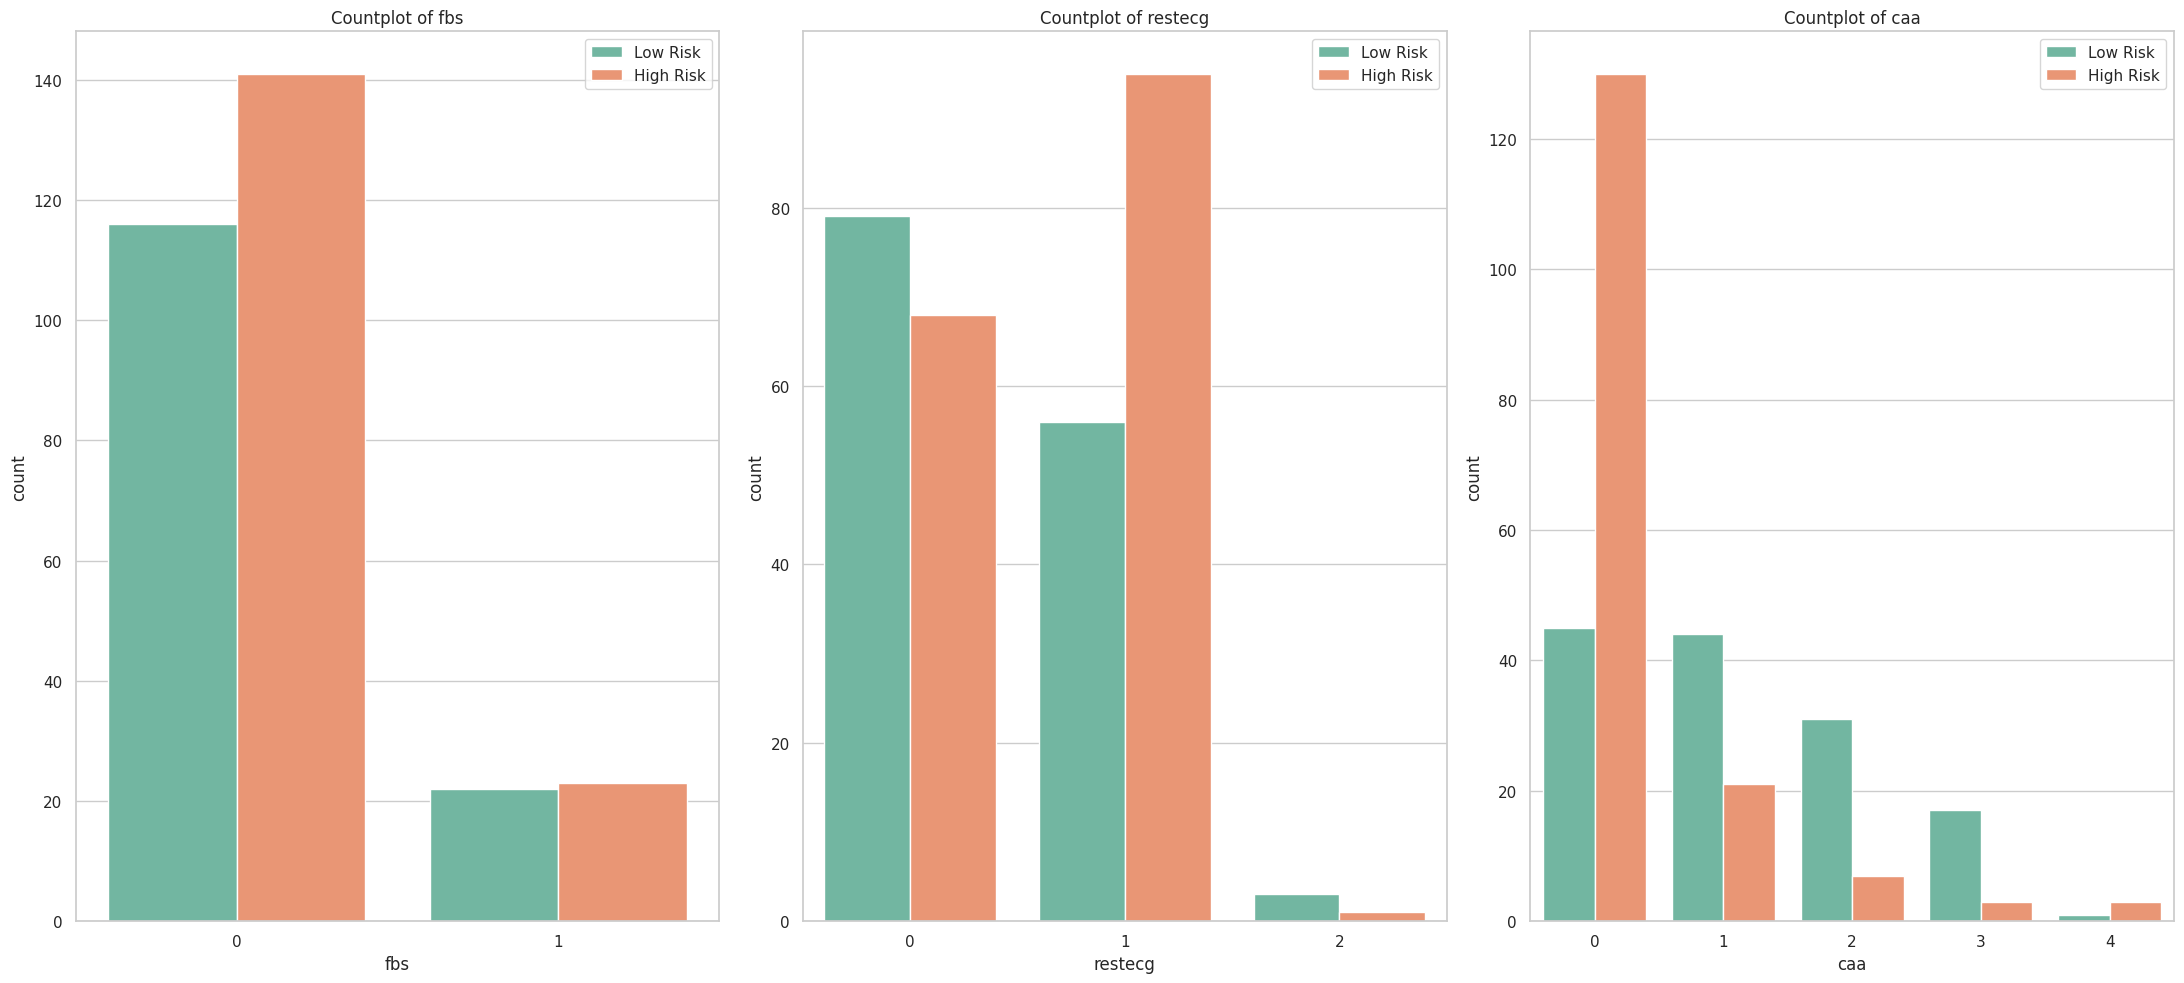

In [55]:
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(22,10))
for ind, column in enumerate(['fbs', 'restecg', 'caa']):
    row = ind//cols
    col = ind%cols
    sns.countplot(df, x=column, hue='output', ax=axes[col])

    axes[col].legend(['Low Risk', 'High Risk'])
    axes[col].set_title(f'Countplot of {column}')

fig.tight_layout()


* The majority of individuals have fasting blood pressure levels below 120 mg/dl, and many in this group experience heart attacks.

* Most people exhibit resting electrocardiographic results with ST-T wave abnormalities, and a significant number of these individuals suffer heart attacks.

* A large proportion of individuals have zero major vessels. Interestingly, the more major vessels a person has, the lower their risk of heart attack, except for those with four major vessels, who face a heightened risk.



# Logistic Regression

<Axes: >

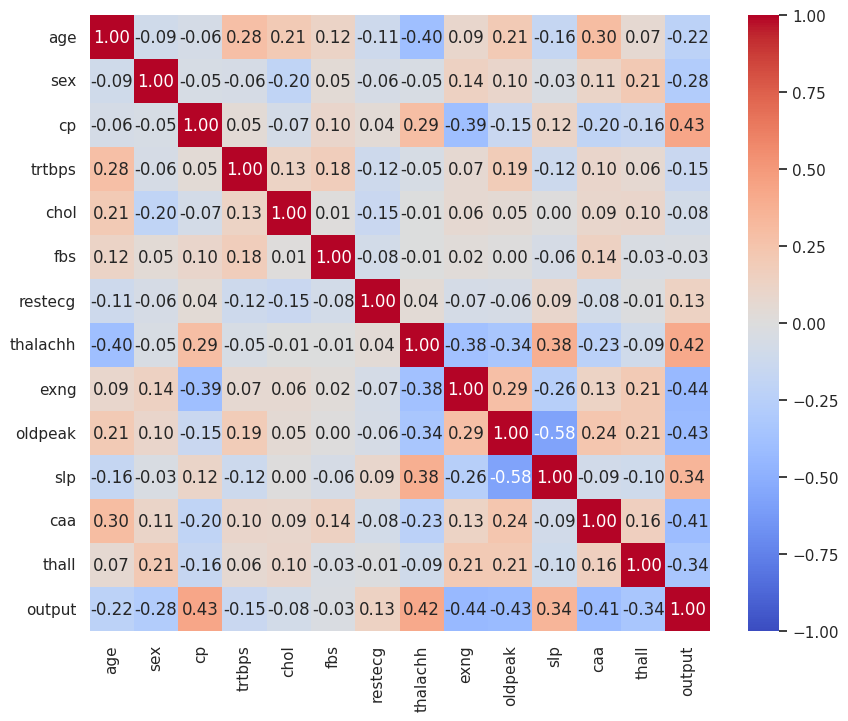

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True, fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1
)

In [57]:
# Importing libraries for LL
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, precision_score, recall_score,
    f1_score
)

import statsmodels.api as sm

In [58]:
X = df.drop('output', axis=1)
features_names = X.columns
y = df.output.reset_index(drop=True)

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=features_names)
X = sm.add_constant(X)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=101)

In [59]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.364983
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Thu, 31 Oct 2024   Pseudo R-squ.:                  0.4693
Time:                        22:37:59   Log-Likelihood:                -87.961
converged:                       True   LL-Null:                       -165.75
Covariance Type:            nonrobust   LLR p-value:                 1.545e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2202      0.198      1.113      0.266      -0.168       0.608
age           -0.0755      0.231     -0.327      0.744      -0.528       0.377
sex           -0.6086      0.231     -2.633      0.008      -1.062      -0.156
cp             0.9922      0.217      4.570      0.000       0.567       1.418
trtbps        -0.1584      0.203     -0.779      0.436      -0.557       0.240
chol          -0.1301      0.215     -0.605      0.545      -0.551       0.291
fbs            0.0097      0.206      0.047      0.962      -0.394       0.413
restecg        0.2189      0.198      1.104      0.270      -0.170       0.608
thalachh       0.2314      0.257      0.901      0.368      -0.272       0.735
exng          -0.5025      0.211     -2.383      0.017      -0.916      -0.089
oldpeak       -0.6753      0.276     -2.449      0.014      -1.216      -0.135
slp            0.2796      0.239      1.172      0.241      -0.188       0.747
caa           -0.6935      0.215     -3.223      0.001      -1.115      -0.272
thall         -0.6214      0.201     -3.096      0.002      -1.015      -0.228
==============================================================================
"""

Summary; features like sex, chest pain type (cp), exercise-induced angina (exng), ST depression (oldpeak), number of major vessels (caa), and thalassemia (thall) are significant predictors.

Meanwhile, age, resting blood pressure, and cholesterol levels do not show significant influence in this model.

Best recall threshold


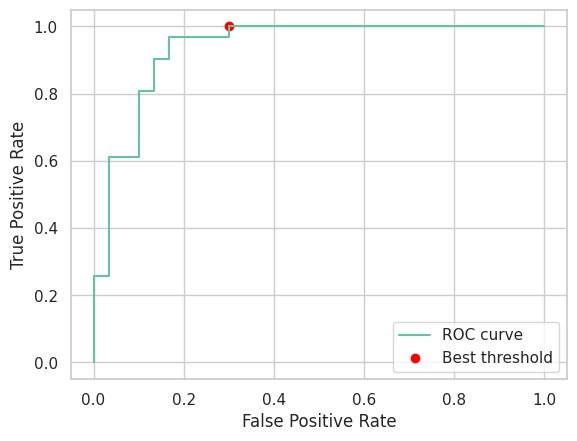

Best threshold: 0.330124978230577
Best F1 score: 0.8732394366197183

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        30
           1       0.78      1.00      0.87        31

    accuracy                           0.85        61
   macro avg       0.89      0.85      0.85        61
weighted avg       0.89      0.85      0.85        61
 

Confusion matrix:
 [[21  9]
 [ 0 31]]


In [60]:
y_scores = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

min_recall = 1

best_threshold = None
best_f1 = 0

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if recall >= min_recall:
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

index = np.where(thresholds == best_threshold)
plt.plot(fpr, tpr, label="ROC curve")
plt.scatter(fpr[index], tpr[index], color='red', label="Best threshold")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}\n")

y_pred = (y_scores >= best_threshold).astype(int)

print("Classification report:\n", classification_report(y_test, y_pred), '\n')
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Best general threshold

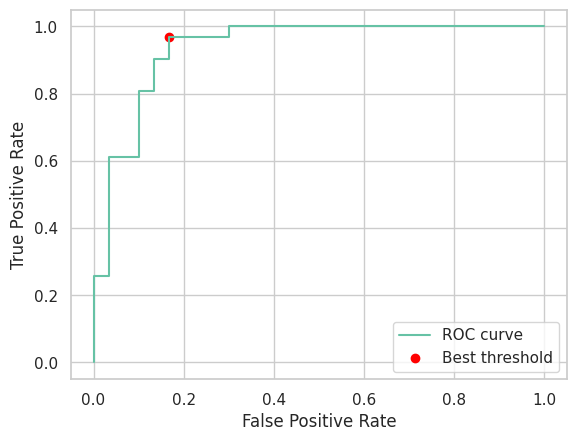

Best threshold: 0.6292189623170114
Best F1 score: 0.9090909090909091

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.86      0.97      0.91        31

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61
 

Confusion matrix:
 [[25  5]
 [ 1 30]]


In [61]:
y_scores = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

min_recall = 0

best_threshold = None
best_f1 = 0

for threshold in thresholds:
    y_pred = (y_scores >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if recall >= min_recall:
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

index = np.where(thresholds == best_threshold)
plt.plot(fpr, tpr, label="ROC curve")
plt.scatter(fpr[index], tpr[index], color='red', label="Best threshold")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1}\n")

y_pred = (y_scores >= best_threshold).astype(int)

print("Classification report:\n", classification_report(y_test, y_pred), '\n')
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Conclusion

In the context of heart attack classification, prioritizing recall is critical. By using a threshold of 0.3301, my model ensures a perfect recall of 100% for class 1, meaning no potential heart attack cases are missed. Although this approach leads to a marginal decrease in the F1 score to 0.8732 and an overall accuracy of 85%, it aligns with the medical necessity of catching every positive instance.

# Different Models + Accuracies

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
models = {
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "XGBoost Classifier":XGBClassifier(),
    "Support Vector Classifier":SVC(),
    "K-Nearest Neighbors Classifier":KNeighborsClassifier(),
    "Gaussian Naive Bayes":GaussianNB(),
    "Linear Discriminant Analysis":LinearDiscriminantAnalysis(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "AdaBoost Classifier":AdaBoostClassifier(),
    "Stochastic Gradient Descent Classifier":SGDClassifier()
}

In [75]:
from sklearn.metrics import accuracy_score

names=[]
accuracies=[]
for name,model in models.items():
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    names.append(name)
    accuracies.append(accuracy_score(y_test,ypred))

In [90]:
result = pd.DataFrame()
result['Model']=names
result['Accuracy']=accuracies
result

,Model,Accuracy
0,Random Forest Classifier,0.836066
1,Decision Tree Classifier,0.754098
2,Logistic Regression,0.852459
3,XGBoost Classifier,0.819672
4,Support Vector Classifier,0.819672
5,K-Nearest Neighbors Classifier,0.836066
6,Gaussian Naive Bayes,0.901639
7,Linear Discriminant Analysis,0.836066
8,Gradient Boosting Classifier,0.836066
9,AdaBoost Classifier,0.754098


In [88]:
print("Best model: ")
print(result.sort_values(by='Accuracy',ascending=False).iloc[0].to_string())

Best model
Model       Gaussian Naive Bayes
Accuracy                0.901639
